In [273]:
#### NOTES ####

# 12/22/18 - Combined data from multiple years into one df
# 12/22/18 - Research on how to make histograms for each gender bigger
# 12/22/18 - Research on warning for deprecated 'normed' kwarg in sns.distplot (matplotlib)
# 12/22/18 - Used aspect arg in FacetGrid func to increase size of histograms for gender BMI
# 12/22/18 - Removed separate df's created for male and female, since viz args allow for
#             segmenting on a category like gender


In [325]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns


import workbench as wp

In [275]:
# Reload workbench module so changes are included
_ = importlib.reload(wp)

In [276]:
# Import demographic data (e.g., gender)
# for each participant
filename = "1999-2000/DEMO.XPT"
demo_2000 = pd.read_sas(filename)
demo_2000.shape

(9965, 144)

In [277]:
# Participant identified in SEQN column
# Confirm dataset has only one entry per participant
demo_2000["SEQN"].is_unique

True

In [278]:
# Import body measurement data
filename = "1999-2000/BMX.XPT"
bmx_2000 = pd.read_sas(filename)
bmx_2000.shape

(9282, 38)

In [279]:
# Participant identified in SEQN column
# Confirm dataset has only one entry per participant
bmx_2000["SEQN"].is_unique

True

In [280]:
# Add bmx info to demo info
combined_2000 = demo_2000.merge(bmx_2000, how="left", on="SEQN")
combined_2000.shape

(9965, 181)

In [281]:
# Verify new column count meets expectations
# Should be number of cols in each dataframe minus 1 for shared col (SEQN)
demo_2000.shape[1] + bmx_2000.shape[1] - 1

181

In [282]:
# Repeat steps with data from survey year 2015-2016

In [283]:
filename = "2015-2016/BMX_I.XPT"
bmx_2016 = pd.read_sas(filename)
bmx_2016.shape

(9544, 26)

In [284]:
bmx_2016["SEQN"].is_unique

True

In [285]:
filename = "2015-2016/DEMO_I.XPT"
demo_2016 = pd.read_sas(filename)
demo_2016.shape

(9971, 47)

In [286]:
demo_2016["SEQN"].is_unique

True

In [287]:
combined_2016 = demo_2016.merge(bmx_2016, how="left", on="SEQN")
combined_2016.shape

(9971, 72)

In [288]:
# Combine 2000 and 2016 data sets

In [289]:
# Add column to each data set so we can later
# identify the year
new_col = "Survey Year"
combined_2000[new_col] = "1999-2000"
combined_2016[new_col] = "2015-2016"

In [290]:
# Combine dfs
# Note: In Pandas 0.23, must explicitly pass a sorting 
# argument in order to avoid a warning (default = None)
# Pass True to sort columns by name
data = pd.concat([combined_2000, combined_2016], sort=True)
data.shape

(19936, 212)

In [291]:
# Will review male and female participants separately
# Review gender entries
df = combined_2000
col = "RIAGENDR"

df[col].value_counts(dropna=False)

2.0    5082
1.0    4883
Name: RIAGENDR, dtype: int64

In [292]:
# Create mapping of gender code to more readable value
# Per codebook 1.0 = male and 2.0 = female
gender_map = {1.0: "Male",
             2.0: "Female",
             np.nan: "Missing"}

In [293]:
# Add column with gender code translation
df = data

new_col = col + "_x"
df[new_col] = df[col].map(gender_map)

In [294]:
print("Participant Counts by Gender")
df.groupby([new_col, "Survey Year"]).size()
#df[new_col].value_counts(dropna=False)

Participant Counts by Gender


RIAGENDR_x  Survey Year
Female      1999-2000      5082
            2015-2016      5079
Male        1999-2000      4883
            2015-2016      4892
dtype: int64

In [295]:
# Create viz's and compute summary stats of bmi measurements

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


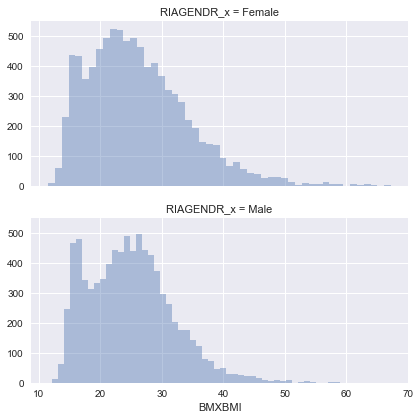

In [296]:
df = data
cat_col = "RIAGENDR" + "_x"
data_col = "BMXBMI"

#sns.set()
#sns.set_context("talk")
g = sns.FacetGrid(df, row=cat_col, aspect=2)
g = g.map(sns.distplot, data_col, kde=False)

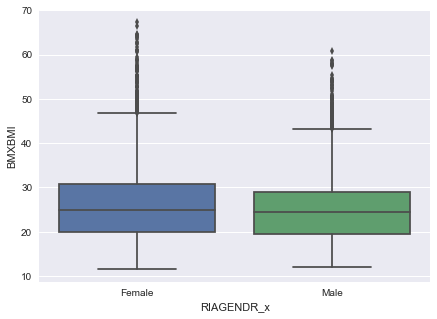

In [297]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=cat_col, y=data_col, data=df)

In [298]:
# Compute summary stats

print("BMI Summary Stats - All Genders")
df[data_col].describe()

BMI Summary Stats - All Genders


count    17218.000000
mean        25.465059
std          7.554681
min         11.490000
25%         19.790000
50%         24.660000
75%         29.800000
max         67.300000
Name: BMXBMI, dtype: float64

In [299]:
# Segment summary by gender

print("BMI Summary Stats - Male and Female Participants")
df.groupby(cat_col).describe()[data_col].T

BMI Summary Stats - Male and Female Participants


RIAGENDR_x,Female,Male
count,8807.000000,8411.000000
mean,26.002057,24.902777
std,8.045325,6.960413
min,11.490000,12.150000
25%,20.000000,19.500000
50%,24.900000,24.470000
75%,30.755000,29.000000
max,67.300000,60.870000


In [300]:
# Explore BMI's between 2000 and 2016 surveys

In [301]:
# Create df's for each gender response

In [302]:
df = data
male_filter = (df["RIAGENDR" + "_x"] == "Male")
female_filter = (df["RIAGENDR" + "_x"] == "Female")

data_male = df[male_filter]
data_female = df[female_filter]

In [303]:
# Gender response = Male

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


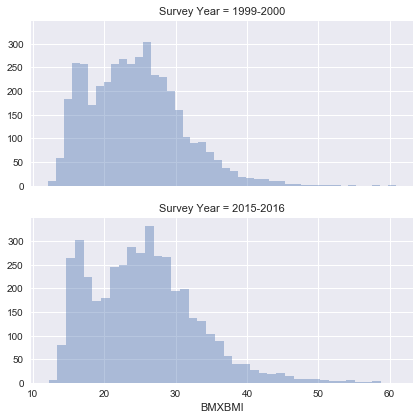

In [304]:
df = data_male
cat_col = "Survey Year"
data_col = "BMXBMI"

#sns.set()
#sns.set_context("talk")
g = sns.FacetGrid(df, row=cat_col, aspect=2)
g = g.map(sns.distplot, data_col, kde=False)

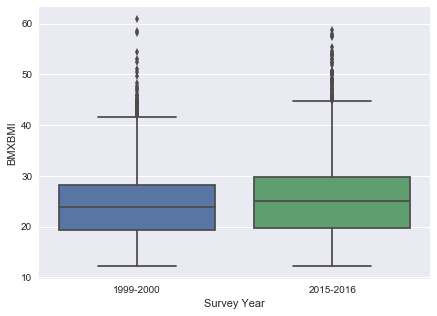

In [305]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=cat_col, y=data_col, data=df)

In [306]:
# Summary stats segmented by survey year

print("BMI Summary Stats - Male")
df.groupby(cat_col).describe()[data_col].T

BMI Summary Stats - Male


Survey Year,1999-2000,2015-2016
count,4125.000000,4286.000000
mean,24.309008,25.474242
std,6.476153,7.352205
min,12.150000,12.200000
25%,19.360000,19.700000
50%,23.940000,25.000000
75%,28.280000,29.700000
max,60.870000,58.800000


In [307]:
# Gender response = Female

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


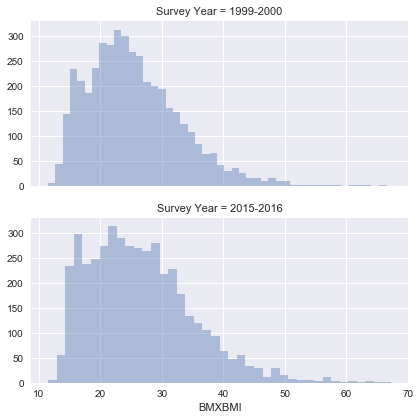

In [308]:
df = data_female
cat_col = "Survey Year"
data_col = "BMXBMI"

#sns.set()
#sns.set_context("talk")
g = sns.FacetGrid(df, row=cat_col, aspect=2)
g = g.map(sns.distplot, data_col, kde=False)

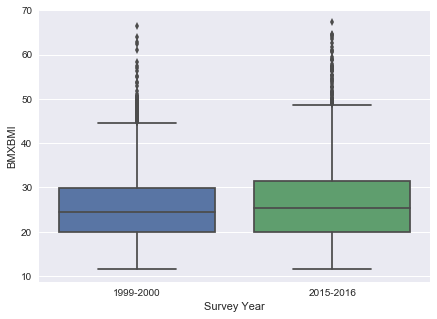

In [309]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=cat_col, y=data_col, data=df)

In [310]:
# Summary stats segmented by survey year

print("BMI Summary Stats - Female")
df.groupby(cat_col).describe()[data_col].T

BMI Summary Stats - Female


Survey Year,1999-2000,2015-2016
count,4337.000000,4470.000000
mean,25.450892,26.536823
std,7.535545,8.477459
min,11.490000,11.500000
25%,19.960000,20.000000
50%,24.370000,25.400000
75%,29.880000,31.500000
max,66.440000,67.300000


In [311]:
df.groupby(cat_col).describe()[data_col].T.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [312]:
df = data
data_segmented_summary_stats = df.groupby(["RIAGENDR" + "_x", "Survey Year"]).describe()[data_col].T
data_segmented_summary_stats

RIAGENDR_x        Female                      Male             
Survey Year    1999-2000    2015-2016    1999-2000    2015-2016
count        4337.000000  4470.000000  4125.000000  4286.000000
mean           25.450892    26.536823    24.309008    25.474242
std             7.535545     8.477459     6.476153     7.352205
min            11.490000    11.500000    12.150000    12.200000
25%            19.960000    20.000000    19.360000    19.700000
50%            24.370000    25.400000    23.940000    25.000000
75%            29.880000    31.500000    28.280000    29.700000
max            66.440000    67.300000    60.870000    58.800000

In [313]:
# Obtain differences between each survey year for each gender

In [314]:
calc_label = "Diff, Y2000 to Y2016"

gen = "Female"

data_segmented_summary_stats.loc[:, (gen, calc_label)] = \
    data_segmented_summary_stats.loc[:, gen].iloc[:, 1] \
    - data_segmented_summary_stats.loc[:, gen].iloc[:, 0]

gen = "Male"

data_segmented_summary_stats.loc[:, (gen, calc_label)] = \
    data_segmented_summary_stats.loc[:, gen].iloc[:, 1] \
    - data_segmented_summary_stats.loc[:, gen].iloc[:, 0]

In [315]:
data_segmented_summary_stats

RIAGENDR_x        Female                      Male               \
Survey Year    1999-2000    2015-2016    1999-2000    2015-2016   
count        4337.000000  4470.000000  4125.000000  4286.000000   
mean           25.450892    26.536823    24.309008    25.474242   
std             7.535545     8.477459     6.476153     7.352205   
min            11.490000    11.500000    12.150000    12.200000   
25%            19.960000    20.000000    19.360000    19.700000   
50%            24.370000    25.400000    23.940000    25.000000   
75%            29.880000    31.500000    28.280000    29.700000   
max            66.440000    67.300000    60.870000    58.800000   

RIAGENDR_x                Female                 Male  
Survey Year Diff, Y2000 to Y2016 Diff, Y2000 to Y2016  
count                 133.000000           161.000000  
mean                    1.085931             1.165233  
std                     0.941914             0.876052  
min                     0.010000             0.050000  
25%                     0.040000             0.340000  
50%                     1.030000             1.060000  
75%                     1.620000             1.420000  
max                     0.860000            -2.070000

In [ ]:
#Example to get scalar
#data_segmented_summary_stats.loc["mean", ("Female", "Diff, Y2000 to Y2016")]

In [322]:
# Determine if the differences between the two years is significant

In [324]:
# Start with gender response = Female

# NULL Hypothesis: The BMI of female respondents has not significantly increased between the Y2000 and Y2016 surveys
# Alternate Hypothesis: The BMI of female respondents has significantly increased between the Y2000 and Y2016 surveys

In [337]:
filter_col = "Survey Year"

df = data_female

df[filter_col].unique()

array(['1999-2000', '2015-2016'], dtype=object)

In [362]:
data_col = "BMXBMI"
filter_col = "Survey Year"

df = data_female

a_filter = (df[filter_col] == "1999-2000")
b_filter = (df[filter_col] == "2015-2016")

a = df[a_filter][data_col].values
b = df[b_filter][data_col].values

t_test_ind_female = stats.ttest_ind(a, b, equal_var=False, nan_policy="omit")

In [359]:
print("Female BMI Y2000 to Y2016\nT-Statistic: {}\nP-Value: {:.10f}".format(
t_test_female[0], t_test_female[1]))

Female BMI Y2000 to Y2016
T-Statistic: -6.358118372718017
P-Value: 0.0000000002


In [384]:
# Store data values to analyze results and verify accuracy

In [385]:
# Create helper functions

In [363]:
def create_df_filter(df, col, filter_value):
    
    return (df[col] == filter_value)

In [390]:
def df_get_values(df, data_col, dropna=True):
    
    if dropna is True:
        df = df.dropna(axis=0, subset=[data_col], how='all')
    
    return list(df[data_col].values)

In [403]:
# Get BMI values for each survey year and gender

df = data
data_col = "BMXBMI"
cat_col = "RIAGENDR" + "_x"
year_col = "Survey Year"

# Create gender filters
female_filter = create_df_filter(df, cat_col, "Female")
male_filter = create_df_filter(df, cat_col, "Male")

# Create survey year filters
survey_year_list = ["1999-2000", "2015-2016"]
year_filter_dict = {
                    survey_year: create_df_filter(
                                df, year_col, survey_year
                                ) for survey_year in survey_year_list}



# Filter overall df and then store values for each gender and survey year

# Create dictionary to store data sets
data_sets_dict = {}

female_2000_df = df[female_filter & year_filter_dict.get(survey_year)]
female_2000_bmi = df_get_values(female_2000_df, data_col)
data_sets_dict["Female_1999-2000"] = female_2000_bmi

female_2016_df = df[female_filter & year_filter_dict.get("2015-2016")]
female_2016_bmi = df_get_values(female_2016_df, data_col)
data_sets_dict["Female_2015-2016"] = female_2016_bmi

male_2000_df = df[male_filter & year_filter_dict.get("1999-2000")]
male_2000_bmi = df_get_values(male_2000_df, data_col)
data_sets_dict["Male_1999-2000"] = male_2000_bmi

male_2016_df = df[male_filter & year_filter_dict.get("2015-2016")]
male_2016_bmi = df_get_values(male_2016_df, data_col)
data_sets_dict["Male_2015-2016"] = male_2016_bmi

In [405]:
# Examine sample sizes
for desc, data_set in data_sets_dict.items():
    print("{} sample size: {}".format(desc, len(data_set)))

Female_1999-2000 sample size: 4337
Female_2015-2016 sample size: 4470
Male_1999-2000 sample size: 4125
Male_2015-2016 sample size: 4286


In [406]:
# Due to unequal sample sizes and earlier finding of unequal standard deviations
# (imply unequal variances), will perform a Welch's t-test instead of a standard t-test

In [411]:
# Welch's t-test requires normality, but BMI is right-skewed.
# Perform a Shapiro-Wilk test to test if data are 'normal enough'

for desc, data_set in data_sets_dict.items():
    print("{} Shapiro-Wilk test results (test_stat, p-value):".format(desc))
    print(stats.shapiro(data_set))
    print("\n")

Female_1999-2000 Shapiro-Wilk test results (test_stat, p-value):
(0.955034613609314, 1.3164573604443663e-34)


Female_2015-2016 Shapiro-Wilk test results (test_stat, p-value):
(0.9505754113197327, 2.1679802880840762e-36)


Male_1999-2000 Shapiro-Wilk test results (test_stat, p-value):
(0.9652901887893677, 2.0494465649524308e-30)


Male_2015-2016 Shapiro-Wilk test results (test_stat, p-value):
(0.9595057368278503, 5.390615789463432e-33)




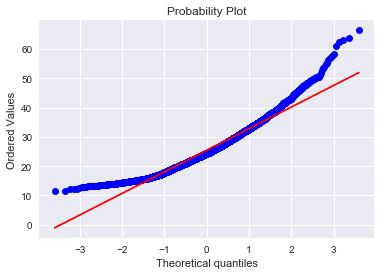

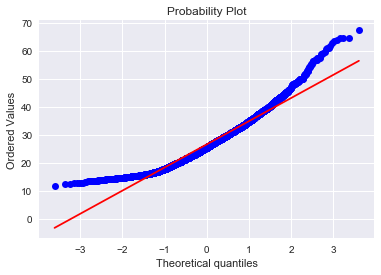

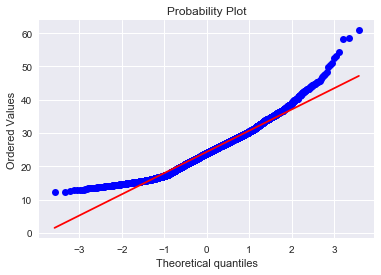

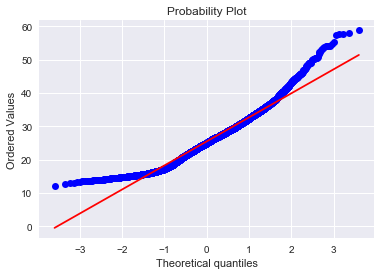

In [412]:
# Shapiro-Wilk tests supports normality, but alpha is somewhat
# unreliable as n approaches 5000
# Review QQ plot as further test

for desc, data_set in data_sets_dict.items():
    stats.probplot(data_set, plot=sns.mpl.pyplot)
    plt.show()

In [418]:
# Run scipy normal test, which uses skew and kurtosis to 
# estimate probablility that sample comes from normal distribution
for desc, data_set in data_sets_dict.items():
    norm_test = stats.normaltest(data_set)
    print("{} Normal test results (test statistic, p-score):".format(desc))
    print("{:.10f}, {:.15f}".format(norm_test[0], norm_test[1]))
    print("\n")

Female_1999-2000 Normal test results (test statistic, p-score):
525.5823074830, 0.000000000000000


Female_2015-2016 Normal test results (test statistic, p-score):
525.6234592328, 0.000000000000000


Male_1999-2000 Normal test results (test statistic, p-score):
351.7685976700, 0.000000000000000


Male_2015-2016 Normal test results (test statistic, p-score):
389.4476481342, 0.000000000000000




In [419]:
# Run test of kurtosis an, which uses skew and kurtosis to 
# estimate probablility that sample comes from normal distribution

for desc, data_set in data_sets_dict.items():
    skew = stats.skewtest(data_set)
    kurtosis = stats.kurtosistest(data_set)
    print("{}".format(desc))
    print("Skew Normal: test-statistic {} (p-value: {})".format(skew[0], skew[1]))
    print("Kurtosis Normal: test-statistic {} (p-value: {})".format(kurtosis[0], kurtosis[1]))
    print("\n")


Female_1999-2000
Skew Normal: test-statistic 20.571631662657577 (p-value: 4.927986760533137e-94)
Kurtosis Normal: test-statistic 10.1188081422135 (p-value: 4.559336209628538e-24)


Female_2015-2016
Skew Normal: test-statistic 20.900167243676325 (p-value: 5.335773009138185e-97)
Kurtosis Normal: test-statistic 9.423718396640359 (p-value: 4.353899483161003e-21)


Male_1999-2000
Skew Normal: test-statistic 16.81603901930796 (p-value: 1.861991521922207e-63)
Kurtosis Normal: test-statistic 8.305987561460359 (p-value: 9.899260586767209e-17)


Male_2015-2016
Skew Normal: test-statistic 17.98743065009876 (p-value: 2.4443132904141806e-72)
Kurtosis Normal: test-statistic 8.117880680451018 (p-value: 4.743948568300685e-16)




In [420]:
for desc, data_set in data_sets_dict.items():
    skew = stats.skewtest(data_set)
    kurtosis = stats.kurtosistest(data_set)
    print("{}".format(desc))
    print("Normal Test: {}".format(skew[0]**2 + kurtosis[0]**2))
    print("\n")


Female_1999-2000
Normal Test: 525.582307482982


Female_2015-2016
Normal Test: 525.6234592328187


Male_1999-2000
Normal Test: 351.768597670022


Male_2015-2016
Normal Test: 389.44764813415213


